<a href="https://colab.research.google.com/github/manashpratim/Quora-Insincere-Questions-Classification/blob/master/Quora_Insincere_Questions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading the Datasets
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10737/290346/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562496110&Signature=MoI4MS2ahHrnKTYhBs6GyCrawyQLaC6muis0M%2FcaHl54q1L6RnwVwc1ElWHX3UcZQToj1YhnmIg4Nm4veYgmbE%2BGU6qwWqlejyUCrRpIZCdrvO9QoCCW52zqjxWFJpJV2QuM7pj7C7gCAjqX9CzlP0OVWesj9tGD5GSRC9wQDfWPezEXUuI08LzWOt02rbexmuNZt7axZ%2B96EKGvBhBHCzndeC75CPNYRVjVs6evEoDUyzM7%2BTtA1R8JgwQgeBJtoEdxQ15OYFaU%2FOGMLePEPzf5XkcU8tI84BFzKLlc%2FDTewheg%2F0irr0xoMx6mCLJ%2BGt%2BszJFKVKgdB6zrKuxOLw%3D%3D&response-content-disposition=attachment%3B+filename%3Dquora-insincere-questions-classification.zip"\
      -O "/tmp/quora.zip"

--2019-07-04 14:33:06--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10737/290346/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562496110&Signature=MoI4MS2ahHrnKTYhBs6GyCrawyQLaC6muis0M%2FcaHl54q1L6RnwVwc1ElWHX3UcZQToj1YhnmIg4Nm4veYgmbE%2BGU6qwWqlejyUCrRpIZCdrvO9QoCCW52zqjxWFJpJV2QuM7pj7C7gCAjqX9CzlP0OVWesj9tGD5GSRC9wQDfWPezEXUuI08LzWOt02rbexmuNZt7axZ%2B96EKGvBhBHCzndeC75CPNYRVjVs6evEoDUyzM7%2BTtA1R8JgwQgeBJtoEdxQ15OYFaU%2FOGMLePEPzf5XkcU8tI84BFzKLlc%2FDTewheg%2F0irr0xoMx6mCLJ%2BGt%2BszJFKVKgdB6zrKuxOLw%3D%3D&response-content-disposition=attachment%3B+filename%3Dquora-insincere-questions-classification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6475626955 (6.0G) [application/zip]
Saving to: ‘/tmp/quora.zip’

/tmp/quora.zip      

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/quora.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/quora')
zip_ref.close()

In [0]:
# Unzipping the word embeddings
import os
import zipfile

local_zip='/tmp/quora/embeddings.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/quora/embeddings')
zip_ref.close()

In [0]:
#Loading the Dataset
import pandas as pd
df=pd.read_csv('/tmp/quora/train.csv')
df_test=pd.read_csv('/tmp/quora/test.csv')

In [83]:
df.head(3)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0


In [84]:
df_test.head(3)

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...


In [8]:
#Class Distribution
df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [9]:
#Functions for Preprocessing the Dataset
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

import re
def clean_text(string):
  clean=re.sub('[\n]',' ',string) #remove newline character
  clean=re.sub('[^a-zA-Z]',' ',clean) #remove non alphabetic characters
  clean=mystopwords(clean) #remove stopwords
  return clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#Cleaning the data and separating the texts and labels
sentences=[]
labels=[]
for i in range(len(df)):
  labels.append(df['target'][i])
  sentences.append(clean_text(df['question_text'][i]))

In [0]:
test_sentences=[]
for i in range(len(df_test)):
  test_sentences.append(clean_text(df['question_text'][i]))

In [0]:
#Suffling the data and splitting the data into train and test sets (90:10)
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels= train_test_split(sentences, labels, test_size=0.1, shuffle= True)

In [88]:
#Data Summary
print('Length of the Data: ',len(df))
print('No. of Training Examples: ',len(train_sentences))
print('No. of Validation Examples: ',len(val_sentences))
print('No. of Classes: ',df['target'].nunique())

Length of the Data:  1306122
No. of Training Examples:  1175509
No. of Validation Examples:  130613
No. of Classes:  2


## **Multinomial Naive Bayes Classifier**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',MultinomialNB())
                   ])

Test Accuracy using MultiNomial Naive Bayes Classifier:  0.9377703597651076
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    122485
           1       0.00      0.00      0.00      8128

    accuracy                           0.94    130613
   macro avg       0.47      0.50      0.48    130613
weighted avg       0.88      0.94      0.91    130613



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


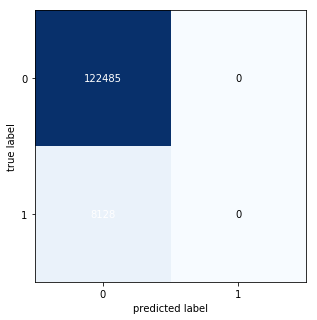

In [16]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using MultiNomial Naive Bayes Classifier: ',accuracy_score(val_labels,pred))

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

### **While the classifier has a high accuracy, it fails to classify  even a single example from the minority class **

## **Support Vector Machines**

In [0]:
from sklearn.svm import SVC
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',SVC())
                   ])

In [0]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using Support Vector Machines: ',accuracy_score(val_labels,pred))

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',LogisticRegression())
                   ])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy using Logistic Regression Classifier:  0.9377320787364198
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    122485
           1       0.44      0.00      0.00      8128

    accuracy                           0.94    130613
   macro avg       0.69      0.50      0.49    130613
weighted avg       0.91      0.94      0.91    130613



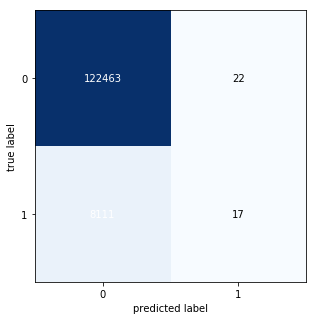

In [18]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using Logistic Regression Classifier: ',accuracy_score(val_labels,pred))

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## **Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',RandomForestClassifier(n_estimators=200))
                   ])

In [20]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using Random Forest Classifier: ',accuracy_score(val_labels,pred))

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

KeyboardInterrupt: ignored

# **Word Embedding Models**

In [89]:
#Tokenization and Padding
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


embedding_dim = 300
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len=49999


tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Original Size of Vocabulary: ',vocab_size)

word_index = {e:i for e,i in word_index.items() if i <= vocab_len+1} #Reducing the Size of Vocabulary
print('New Size of Vocabulary: ',len(word_index))

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_labels=np.expand_dims(train_labels, axis=1)
val_labels=np.expand_dims(val_labels, axis=1)


Original Size of Vocabulary:  178863
New Size of Vocabulary:  50000


In [90]:
#Dimension of Data after Tokenizing and Padding
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Validation Data: ',val_padded.shape)
print('Dimension of Training Labels: ',train_labels.shape)
print('Dimension of Validation Labels: ',val_labels.shape)
print('Dimension of Test Data: ',test_padded.shape)

Dimension of Training Data:  (1175509, 100)
Dimension of Validation Data:  (130613, 100)
Dimension of Training Labels:  (1175509, 1)
Dimension of Validation Labels:  (130613, 1)
Dimension of Test Data:  (375806, 100)


## **Bidirectional LSTM Model**

In [33]:
#Building the Bidirectional LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0704 15:41:22.348512 139660615804800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0704 15:41:22.351063 139660615804800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Orthogonal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0704 15:41:22.352190 139660615804800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is de

In [35]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 5
history=model.fit(train_padded, train_labels, epochs=num_epochs, batch_size=1024, validation_data=(val_padded,val_labels),callbacks=[reduce],verbose=1)

Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1175509/1175509 [==============================] - 444s 378us/sample - loss: 0.1237 - acc: 0.9521 - val_loss: 0.1170 - val_acc: 0.9533
Epoch 2/5
1175509/1175509 [==============================] - 438s 372us/sample - loss: 0.1123 - acc: 0.9562 - val_loss: 0.1164 - val_acc: 0.9536
Epoch 3/5
1175509/1175509 [==============================] - 437s 372us/sample - loss: 0.1070 - acc: 0.9586 - val_loss: 0.1139 - val_acc: 0.9556
Epoch 4/5
1175509/1175509 [==============================] - 436s 371us/sample - loss: 0.1031 - acc: 0.9604 - val_loss: 0.1138 - val_acc: 0.9556
Epoch 5/5
1175509/1175509 [==============================] - 436s 370us/sample - loss: 0.0987 - acc: 0.9624 - val_loss: 0.1159 - val_acc: 0.9543


In [54]:
#Determining the optimal threshold value to seggregate the classes
pred_noemb_val_labels = model.predict(val_padded, batch_size=1024,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.5, 0.05):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred_noemb_val_labels>thresh).astype(int))))

130613/130613 [==============================] - 18s 137us/sample
F1 score at threshold 0.1 is 0.550374985119638
F1 score at threshold 0.15 is 0.5847472605160834
F1 score at threshold 0.2 is 0.6066278292426703
F1 score at threshold 0.25 is 0.6199002950452742
F1 score at threshold 0.3 is 0.6273268601469877
F1 score at threshold 0.35 is 0.6323736548537945
F1 score at threshold 0.4 is 0.6317893251822243
F1 score at threshold 0.45 is 0.6265192695291029


              precision    recall  f1-score   support

           0       0.98      0.97      0.97    122485
           1       0.58      0.69      0.63      8128

    accuracy                           0.95    130613
   macro avg       0.78      0.83      0.80    130613
weighted avg       0.95      0.95      0.95    130613

[[118476   4009]
 [  2516   5612]]


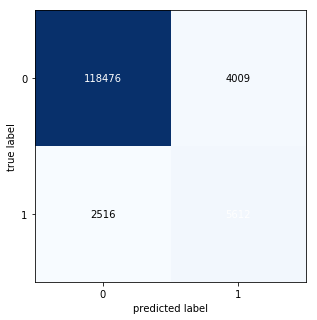

In [57]:
# From above, we can see that F1 score is highest at a threshold of 0.35
pred_val_labels=(pred_noemb_val_labels>0.35).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_val_labels))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_val_labels))
CM = confusion_matrix(val_labels, pred_val_labels)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

# **Pretrained Word Embeddings**

## **fastText**

In [0]:
# Loading the pretrained vectors
embeddings_index = {}
import numpy as np
with open('/tmp/quora/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec') as f:
    for line in f:
      try:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
      except:
        continue

In [0]:
# Creating an embedding matrix that contains the vectors of the words in the dataset
embeddings_matrix = np.zeros((vocab_len+2, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embeddings_matrix[i] = embedding_vector

In [0]:
embeddings_matrix=np.delete(embeddings_matrix, 1, 0)

In [91]:
print('Shape of Embedding Matrix: ',embeddings_matrix.shape)

Shape of Embedding Matrix:  (50000, 300)


In [0]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix], trainable = False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [0]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model2.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 5
history2=model2.fit(train_padded, 
                    train_labels, 
                    epochs=num_epochs, 
                    batch_size=1024, 
                    validation_data=(val_padded,val_labels),
                    callbacks=[reduce],
                    verbose=1)

Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1174528/1175509 [============================>.] - ETA: 0s - loss: 0.1786 - acc: 0.9406

In [0]:
#Determining the optimal threshold value to seggregate the classes
pred_ft_val_labels = model2.predict(val_padded, batch_size=1024,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.5, 0.05):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred_ft_val_labels>thresh).astype(int))))

In [0]:
# From above, we can see that F1 score is highest at a threshold of 0.35
pred_ft_val_labels=(pred_ft_val_labels>0.35).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_ft_val_labels))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_ft_val_labels))
CM = confusion_matrix(val_labels, pred_ft_val_labels)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()